In [2]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/dilnaz300703/EEG-to-Speech-Synthesis-Decoding-Brain-Signals-/notebooks


## Data Download and Setup

The dataset used for this project is the *SingleWordProductionDutch* EEG dataset:

1. Navigate to [https://osf.io/nrgx6/files/g6q5m](https://osf.io/nrgx6/files/g6q5m)
2. Click "Download" to get the dataset manually (the file is large and cannot be pushed to GitHub)
3. Move the downloaded file into the project folder:

```bash
mv ~/Downloads/SingleWordProductionDutch.zip data/raw/

Unzip the file

In [ ]:
unzip data/raw/SingleWordProductionDutch.zip -d data/raw/

Data Visualization

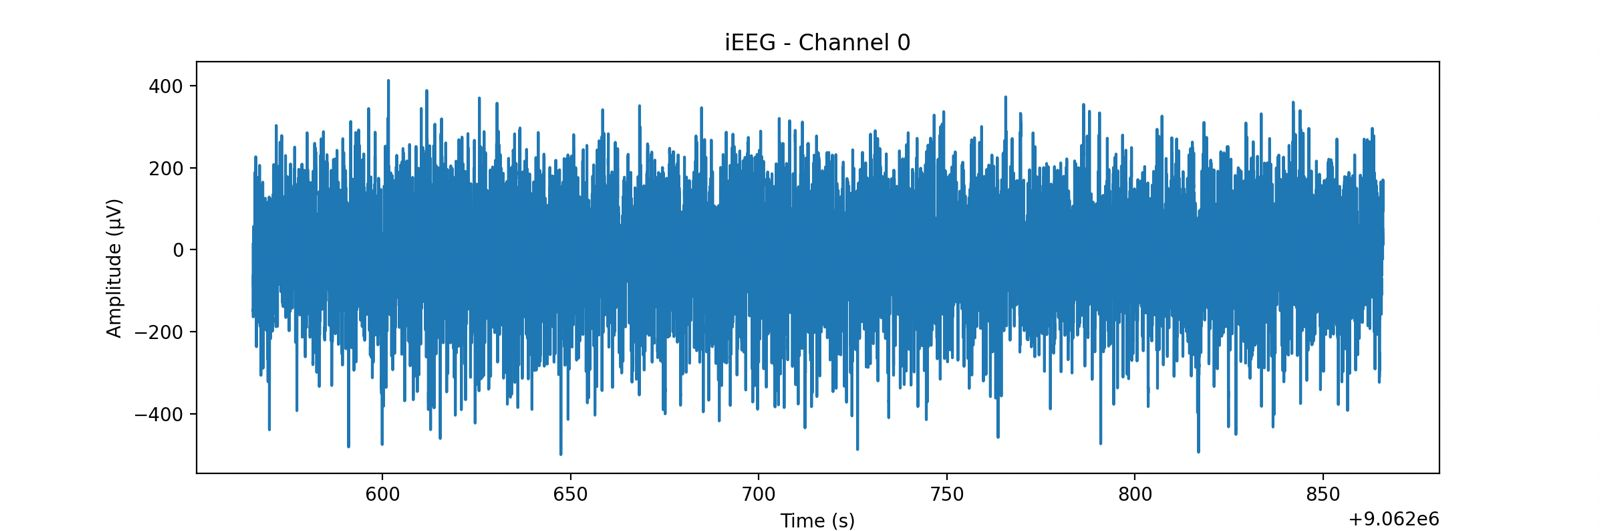

In [13]:
from IPython.display import Image, display
import os

# Simple display
Image(filename="/Users/dilnaz300703/Downloads/WhatsApp Image 2025-10-20 at 20.01.53.jpeg", width=1000)

In [ ]:
python src/explore_data.py 

iEEG shape: (307511, 127)
Stimulus length: 307511
Audio shape: (14414532,)

Features extraction

The feature extraction process follows the methodology described in the SingleWordProductionDutch dataset paper, with several key improvements and adaptations. Here are the list of the main changes that we implemented:

1. Mel Spectrogram Extraction 
The original code used a custom MelFilterBank module that wasn't available as a dependency, so we switched to using librosa instead. Other key changes:
Convert the audio to float32 format and normalize it properly
Use librosa's built-in mel spectrogram functions 
Keep the same timing parameters

2. Audio Preprocessing
We added some necessary data handling steps so librosa doesn't throw errors:
Convert integer audio samples to float32
Normalize everything to the -1 to 1 range
This fixed the "Audio data must be floating-point" error that was popping up


Data Exploration & Visualization

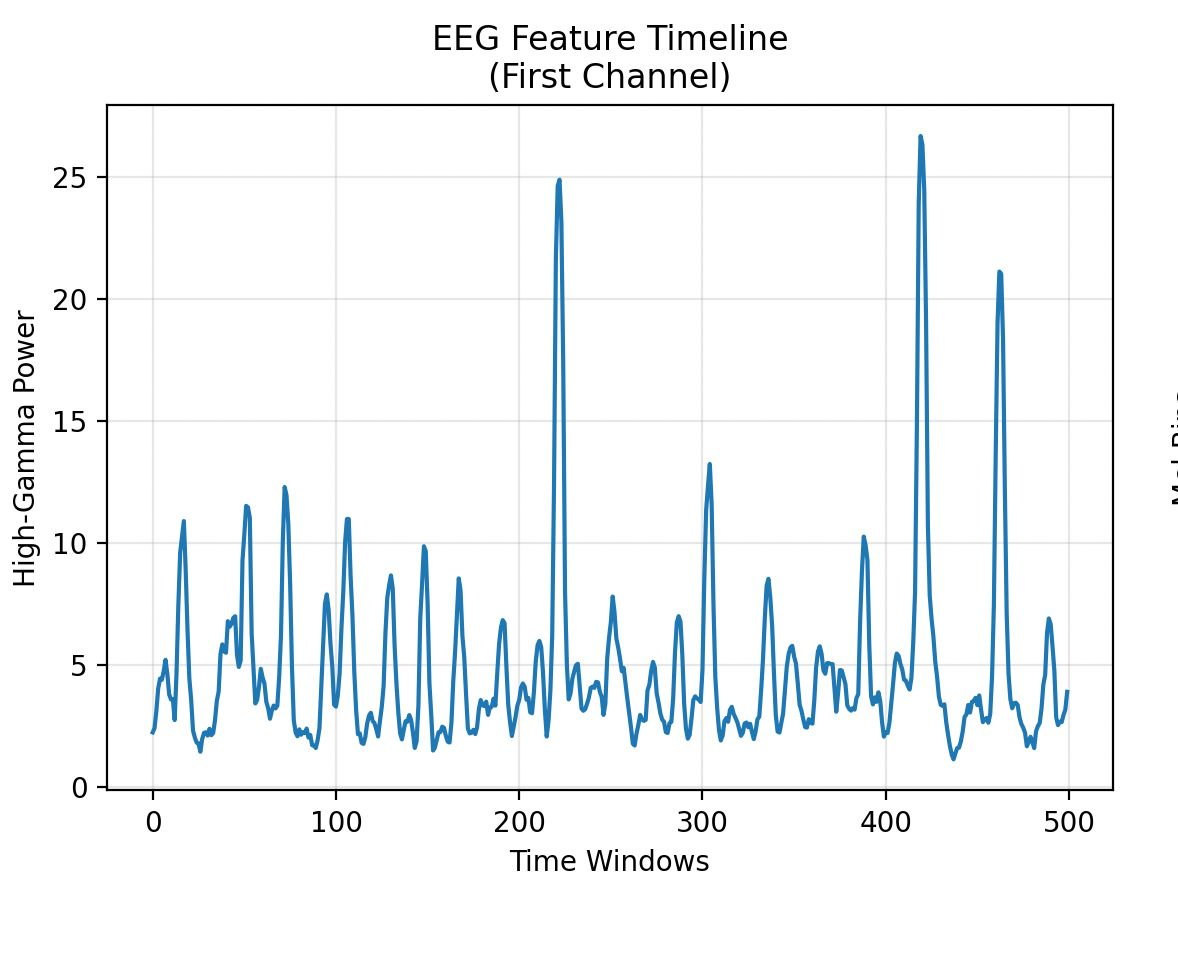

In [5]:
from IPython.display import Image, display
import os

# Simple display
Image(filename="/Users/dilnaz300703/Downloads/WhatsApp Image 2025-10-20 at 22.47.54.jpeg", width=500)

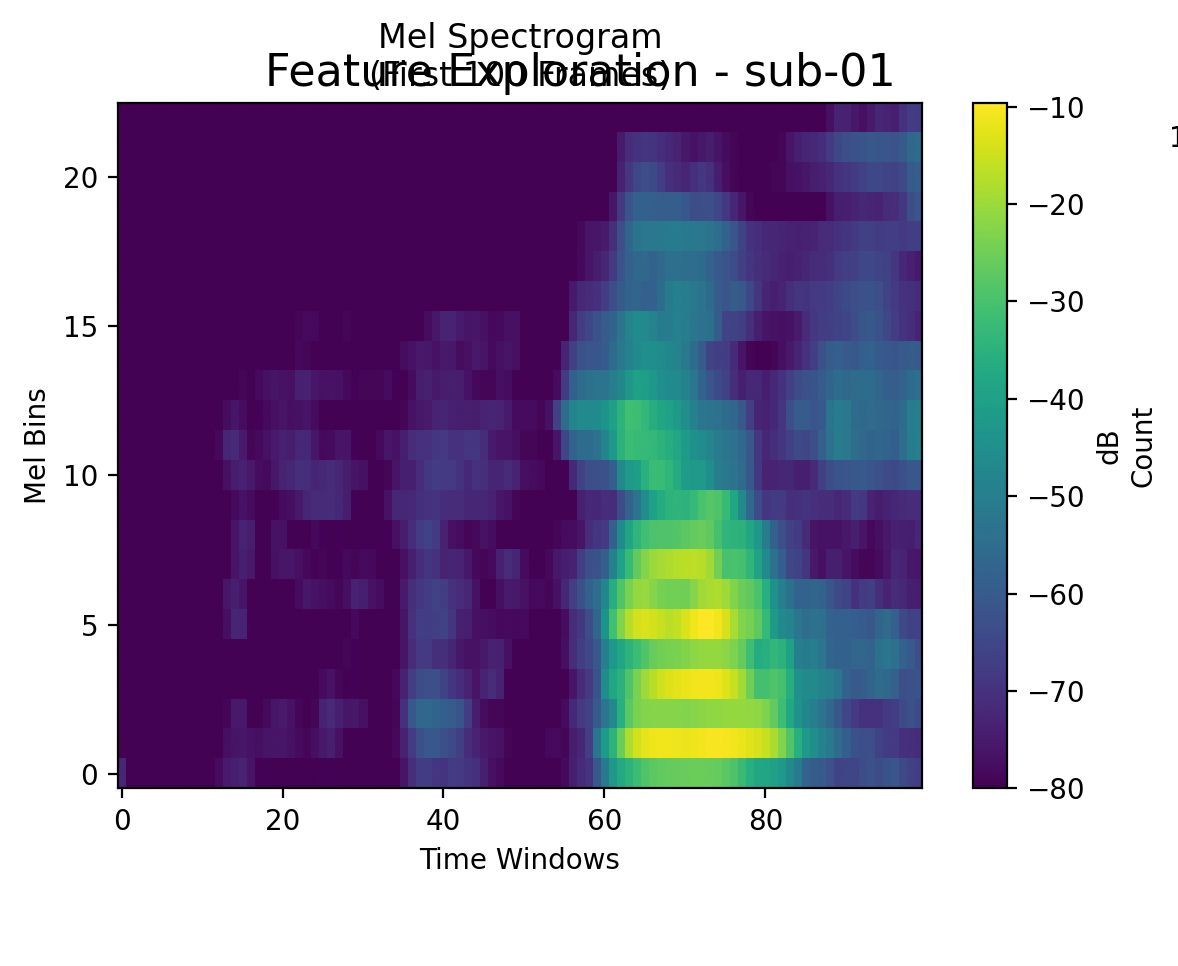

In [4]:
from IPython.display import Image, display
import os

# Simple display
Image(filename="/Users/dilnaz300703/Downloads/WhatsApp Image 2025-10-20 at 22.48.17.jpeg", width=500)

Validation of Data

This script loads the preprocessed neural features, mel spectrograms, and word labels for subject 01 and prints their dimensions to verify the data structure.

In [ ]:
import numpy as np

feat = np.load('/Users/rritahajrizi/BCI-Brain2Speech/data/processed/features/sub-01_feat.npy')
melSpec = np.load('/Users/rritahajrizi/BCI-Brain2Speech/data/processed/features/sub-01_spec.npy')
words = np.load('/Users/rritahajrizi/BCI-Brain2Speech/data/processed/features/sub-01_procWords.npy', allow_pickle=True)

print("EEG features shape:", feat.shape)
print("Mel spectrogram shape:", melSpec.shape)
print("Words shape:", words.shape)

(brain2speech) rritahajrizi@Rritas-MacBook-Pro:~/BCI-Brain2Speech$ python src/validate_feats.py
EEG features shape: (29985, 1143)
Mel spectrogram shape: (29985, 23)
Words shape: (29985,)